<a href="https://colab.research.google.com/github/ProfAndersonVanin/FATEC_MINERACAO_DADOS_2SEM2024/blob/main/WebScraping_MeuSite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL da página inicial
url = 'https://profandersonvanin.github.io/site-exemplo-web-scraping/index2.html'

# Fazer a requisição para o site
response = requests.get(url)

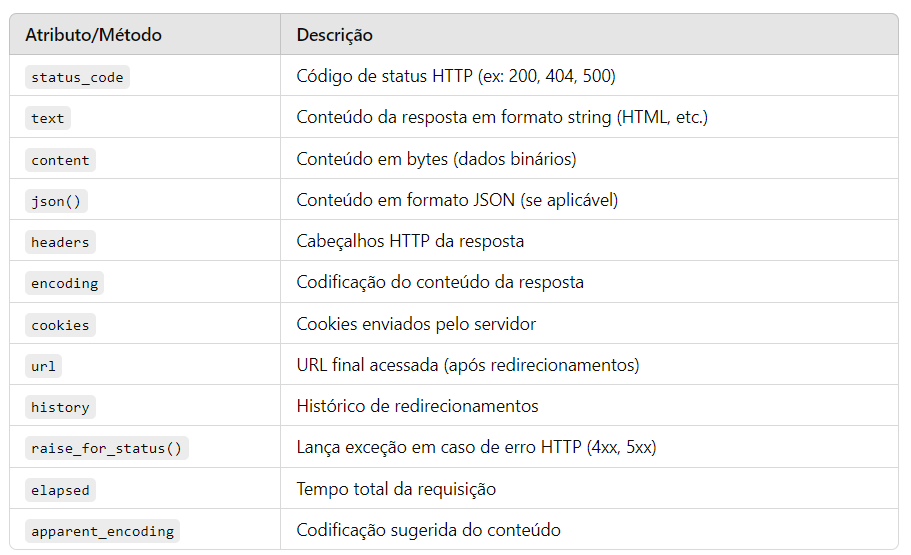

In [5]:
print(response.text)

<!DOCTYPE html>
<html lang="pt-BR">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Loja de Produtos</title>
    <style>
        /* Reset básico */
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }

        /* Estilo do corpo */
        body {
            font-family: Arial, sans-serif;
            background-color: #f5f5f5;
            color: #333;
            padding: 20px;
        }

        /* Cabeçalho */
        header {
            background-color: #4CAF50;
            padding: 10px;
            text-align: center;
            color: #fff;
            margin-bottom: 20px;
        }

        header h1 {
            font-size: 2rem;
        }

        /* Estilo das categorias */
        .categoria {
            margin-bottom: 30px;
        }

        .categoria h2 {
            font-size: 1.8rem;
            color: #4CAF50;
            margin-bottom: 10px

In [6]:
response.content

b'<!DOCTYPE html>\r\n<html lang="pt-BR">\r\n<head>\r\n    <meta charset="UTF-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <title>Loja de Produtos</title>\r\n    <style>\r\n        /* Reset b\xc3\xa1sico */\r\n        * {\r\n            margin: 0;\r\n            padding: 0;\r\n            box-sizing: border-box;\r\n        }\r\n\r\n        /* Estilo do corpo */\r\n        body {\r\n            font-family: Arial, sans-serif;\r\n            background-color: #f5f5f5;\r\n            color: #333;\r\n            padding: 20px;\r\n        }\r\n\r\n        /* Cabe\xc3\xa7alho */\r\n        header {\r\n            background-color: #4CAF50;\r\n            padding: 10px;\r\n            text-align: center;\r\n            color: #fff;\r\n            margin-bottom: 20px;\r\n        }\r\n\r\n        header h1 {\r\n            font-size: 2rem;\r\n        }\r\n\r\n        /* Estilo das categorias */\r\n        .categoria {\r\n            margin-bottom: 30px

In [15]:
# Parsing do HTML com BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

In [16]:
print(soup)

<!DOCTYPE html>

<html lang="pt-BR">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Loja de Produtos</title>
<style>
        /* Reset básico */
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }

        /* Estilo do corpo */
        body {
            font-family: Arial, sans-serif;
            background-color: #f5f5f5;
            color: #333;
            padding: 20px;
        }

        /* Cabeçalho */
        header {
            background-color: #4CAF50;
            padding: 10px;
            text-align: center;
            color: #fff;
            margin-bottom: 20px;
        }

        header h1 {
            font-size: 2rem;
        }

        /* Estilo das categorias */
        .categoria {
            margin-bottom: 30px;
        }

        .categoria h2 {
            font-size: 1.8rem;
            color: #4CAF50;
            margin-bottom: 10px;
        }



In [18]:
# Encontrar todas as categorias (elementos h2)
categorias = soup.find_all('h2')

In [19]:
categorias

[<h2>Eletrônicos</h2>,
 <h2>Livros</h2>,
 <h2>Moda</h2>,
 <h2>Esportes</h2>,
 <h2>Casa e Jardim</h2>]

In [20]:
lista_categorias = []

In [22]:
for categoria in categorias:
  texto = categoria.get_text()
  print(texto)

Eletrônicos
Livros
Moda
Esportes
Casa e Jardim


In [23]:
for categoria in categorias:
  texto = categoria.get_text()
  #print(texto)
  lista_categorias.append(texto)

In [24]:
# Exibir a lista de categorias
print(lista_categorias)

['Eletrônicos', 'Livros', 'Moda', 'Esportes', 'Casa e Jardim']


In [ ]:
# Criar uma lista para armazenar os nomes das categorias
#lista_categorias = [categoria.get_text() for categoria in categorias]

# Exibir a lista de categorias
#print(lista_categorias)

In [25]:
# Encontrar todos os nomes dos produtos (elementos h3)
nomes = soup.find_all('h3')

In [26]:
lista_nomes = [nome.get_text() for nome in nomes]

# Exibir a lista de categorias
print(lista_nomes)

['Smartphone X200', 'Notebook Pro 15"', 'Smartwatch Fit', 'Aventuras na Programação', 'História da Ciência', 'Camisa Casual', 'Calça Jeans', 'Tênis de Corrida', 'Bola de Futebol', 'Vaso Decorativo', 'Kit de Jardinagem']


In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL do site
url = 'https://profandersonvanin.github.io/site-exemplo-web-scraping/index2.html'  # Modifique para o caminho do arquivo HTML ou a URL online.

# Fazendo a requisição para o site
response = requests.get(url)

# Criando o objeto BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Inicializando uma lista para armazenar os dados dos produtos
dados_produtos = []

# Encontrar todas as seções de categorias
categorias = soup.find_all('section', class_='categoria')

# Iterar sobre cada categoria
for categoria in categorias:
    nome_categoria = categoria.find('h2').get_text()  # Nome da categoria
    produtos = categoria.find_all('div', class_='produto')  # Todos os produtos da categoria

    # Iterar sobre cada produto
    for produto in produtos:
        nome_produto = produto.find('h3').get_text()  # Nome do produto
        descricao_produto = produto.find('p').get_text()  # Descrição do produto
        valor_produto = produto.find('p', class_='preco').get_text()  # Valor do produto

        # Remover "R$" e substituir vírgula por ponto para converter em float
        valor_produto = valor_produto.replace('R$', '').replace('.', '').replace(',', '.').strip()

        # Adicionar os dados a lista
        dados_produtos.append([nome_categoria, nome_produto, descricao_produto, float(valor_produto)])

# Criar o DataFrame com as colunas: Categoria, Nome, Descrição, Valor
df = pd.DataFrame(dados_produtos, columns=['Categoria', 'Nome', 'Descrição', 'Valor'])

# Exibir o DataFrame
print(df)


        Categoria                      Nome  \
0     Eletrônicos           Smartphone X200   
1     Eletrônicos          Notebook Pro 15"   
2     Eletrônicos            Smartwatch Fit   
3          Livros  Aventuras na Programação   
4          Livros       História da Ciência   
5            Moda             Camisa Casual   
6            Moda               Calça Jeans   
7        Esportes          Tênis de Corrida   
8        Esportes           Bola de Futebol   
9   Casa e Jardim           Vaso Decorativo   
10  Casa e Jardim         Kit de Jardinagem   

                                           Descrição    Valor  
0       Alta performance e câmera de última geração.  2499.99  
1         Poder de processamento para profissionais.  5399.00  
2                   Controle sua saúde e atividades.   899.90  
3      Guia completo para iniciantes em programação.    45.90  
4       Uma jornada pelo desenvolvimento científico.    67.50  
5                Conforto e estilo para o dia a dia

In [29]:
df.head(30)

,Categoria,Nome,Descrição,Valor
0,Eletrônicos,Smartphone X200,Alta performance e câmera de última geração.,2499.99
1,Eletrônicos,"Notebook Pro 15""",Poder de processamento para profissionais.,5399.00
2,Eletrônicos,Smartwatch Fit,Controle sua saúde e atividades.,899.90
3,Livros,Aventuras na Programação,Guia completo para iniciantes em programação.,45.90
4,Livros,História da Ciência,Uma jornada pelo desenvolvimento científico.,67.50
5,Moda,Camisa Casual,Conforto e estilo para o dia a dia.,79.99
6,Moda,Calça Jeans,Modelagem slim fit para um look moderno.,99.90
7,Esportes,Tênis de Corrida,Desenvolvido para conforto em longas distâncias.,299.99
8,Esportes,Bola de Futebol,Material resistente para maior durabilidade.,59.90
9,Casa e Jardim,Vaso Decorativo,Elegância para decorar seu ambiente.,39.99
